In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import pandas as pd
df = pd.read_csv('Clean rent data_Hamburg.csv')
df.head()

,Area ($m^2$),Number of rooms,Latitude,Longitude,Rent (in eur)
0,45.43,1.0,53.571509,10.012736,995.0
1,51.86,2.0,53.483600,10.125000,1135.0
2,45.64,2.0,53.492292,9.996217,1118.0
3,52.07,2.0,53.542913,9.995835,1275.0
4,57.25,2.0,53.596390,10.003832,1374.0


In [4]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

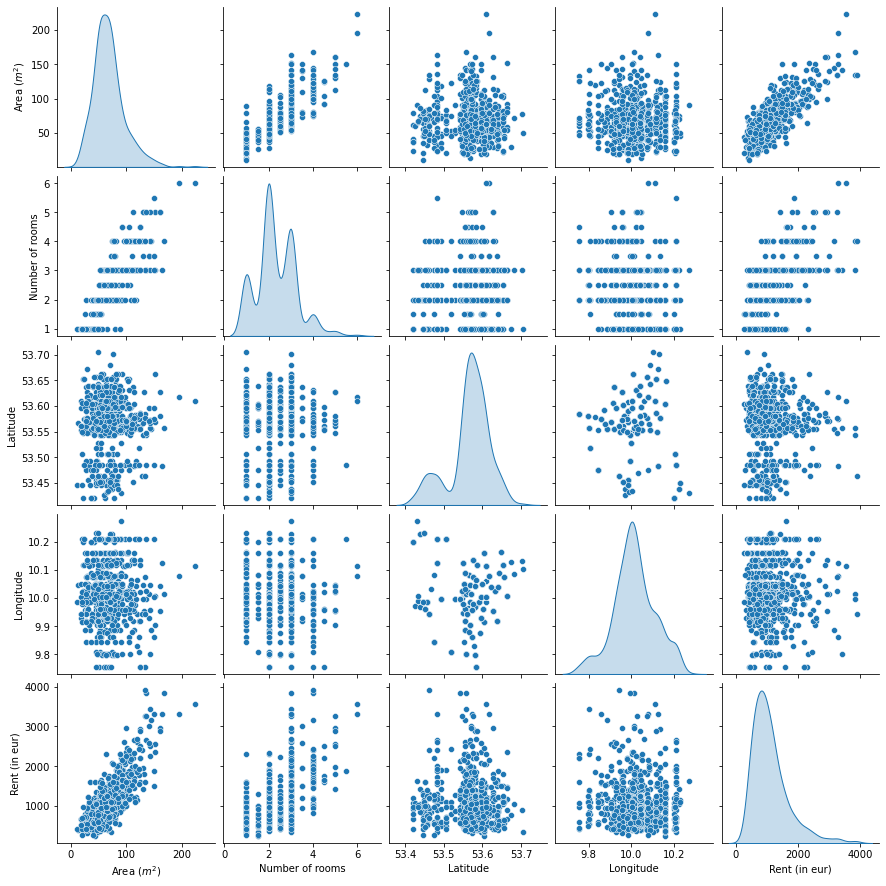

In [7]:
import seaborn as sns
sns.pairplot(train_dataset[['Area ($m^2$)', 'Number of rooms', 'Latitude', 'Longitude', 'Rent (in eur)']], diag_kind='kde')

In [8]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Rent (in eur)')
test_labels = test_features.pop('Rent (in eur)')

In [10]:
import numpy as np
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[68.47289    2.3345475 53.56604   10.014654 ]]


In [11]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[75.    2.   53.46  9.99]]

Normalized: [[ 0.23 -0.37 -2.08 -0.28]]
